In [ ]:
# prompt:  Läsa in data från en SQL-databas Köksglädje.db  Transactions, TransactionDetails, Stores

import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('Köksglädje.db')

# Function to read data from a table
def read_table(table_name):
    try:
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        print(f"Error reading table {table_name}: {e}")
        return None

# Read data from each table
transactions_df = read_table("Transactions")
transaction_details_df = read_table("TransactionDetails")
stores_df = read_table("Stores")

# Print the first few rows of each DataFrame (optional)
if transactions_df is not None:
  print("Transactions:")
  print(transactions_df.head())

if transaction_details_df is not None:
  print("\nTransactionDetails:")
  print(transaction_details_df.head())

if stores_df is not None:
  print("\nStores:")
  print(stores_df.head())

# Close the connection
conn.close()

Transactions:
   TransactionID  StoreID  CustomerID TransactionDate
0              1        8          62     2021-05-04 
1              2        2          11     2021-05-04 
2              3        1          66     2021-05-04 
3              4        6          23     2021-05-05 
4              5        8          75     2021-05-05 

TransactionDetails:
   TransactionDetailID  TransactionID  ProductID  Quantity  PriceAtPurchase  \
0                    1              1         14         1            899.0   
1                    2              1         23         3            249.0   
2                    3              1         37         1            199.0   
3                    4              1          8         1            699.0   
4                    5              2          2         1            799.0   

   TotalPrice  
0       899.0  
1       747.0  
2       199.0  
3       699.0  
4       799.0  

Stores:
   StoreID                    StoreName   Location
0        1

In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Köksglädje.db')

# Load the necessary tables into DataFrames
transactions = pd.read_sql_query("SELECT * FROM Transactions", conn)
transaction_details = pd.read_sql_query("SELECT * FROM TransactionDetails", conn)
stores = pd.read_sql_query("SELECT * FROM Stores", conn)

# Merge the DataFrames to get the required columns
merged_df = pd.merge(transactions, transaction_details, on='TransactionID')
merged_df = pd.merge(merged_df, stores, on='StoreID')

# Group by StoreID and StoreName, and calculate the total sales volume
sales_volume = merged_df.groupby(['StoreID', 'StoreName']).agg({'TotalPrice': 'sum'}).reset_index()

# Sort the result by TotalPrice in descending order
sales_volume = sales_volume.sort_values(by='TotalPrice', ascending=False)

# Display the result
print(sales_volume)


   StoreID                     StoreName  TotalPrice
0        1         Köksbutiken Stockholm    304139.0
1        2     Stockholms Knivspecialist    302076.0
3        4             Stockholm Gourmet    298087.0
2        3   Matlagningshörnan Stockholm    290954.0
5        6  Grytor & Stekpannor Göteborg    277167.0
4        5    Matlagningshörnan Göteborg    220349.0
6        7          Köksredskap Göteborg    218065.0
8        9              Malmö Gourmetkök    176275.0
7        8            Köksproffset Malmö    146298.0


   StoreID                     StoreName  TotalPrice
0        1         Köksbutiken Stockholm    304139.0
1        2     Stockholms Knivspecialist    302076.0
3        4             Stockholm Gourmet    298087.0
2        3   Matlagningshörnan Stockholm    290954.0
5        6  Grytor & Stekpannor Göteborg    277167.0
4        5    Matlagningshörnan Göteborg    220349.0
6        7          Köksredskap Göteborg    218065.0
8        9              Malmö Gourmetkök    176275.0
7        8            Köksproffset Malmö    146298.0


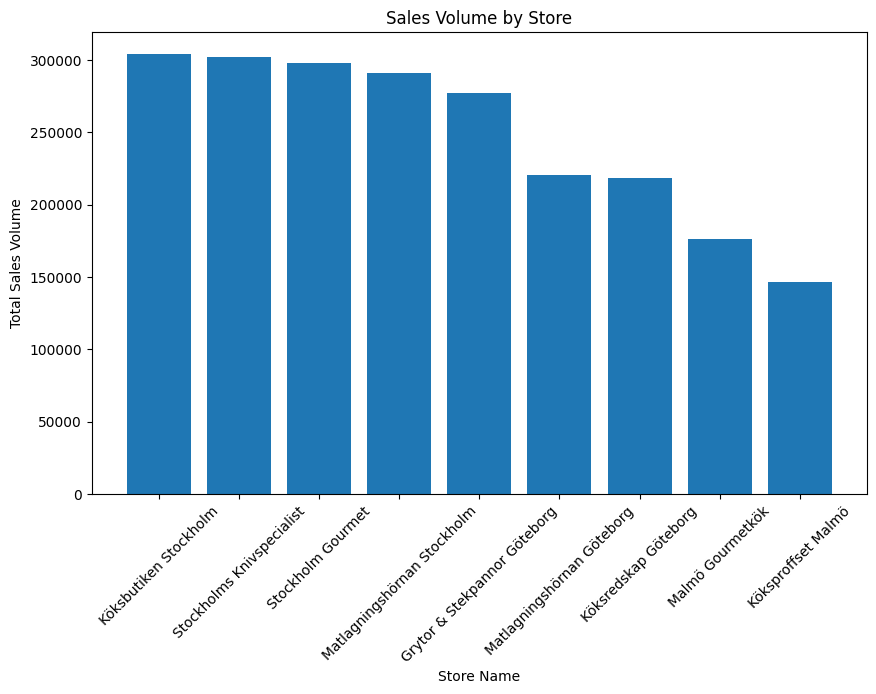

In [30]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Köksglädje.db')

# Load the necessary tables into DataFrames
transactions = pd.read_sql_query("SELECT * FROM Transactions", conn)
transaction_details = pd.read_sql_query("SELECT * FROM TransactionDetails", conn)
stores = pd.read_sql_query("SELECT * FROM Stores", conn)

# Merge the DataFrames to get the required columns
merged_df = pd.merge(transactions, transaction_details, on='TransactionID')
merged_df = pd.merge(merged_df, stores, on='StoreID')

# Group by StoreID and StoreName, and calculate the total sales volume
sales_volume = merged_df.groupby(['StoreID', 'StoreName']).agg({'TotalPrice': 'sum'}).reset_index()

# Sort the result by TotalPrice in descending order
sales_volume = sales_volume.sort_values(by='TotalPrice', ascending=False)

# Display the sales volume data
print(sales_volume)

# Plot the sales volume data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sales_volume['StoreName'], sales_volume['TotalPrice'])
plt.xlabel('Store Name')
plt.ylabel('Total Sales Volume')
plt.title('Sales Volume by Store')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import sqlite3
import pandas as pd
import streamlit as st

# Connect to the SQLite database
conn = sqlite3.connect('Köksglädje.db')

# Load the necessary tables into DataFrames
transactions = pd.read_sql_query("SELECT * FROM Transactions", conn)
transaction_details = pd.read_sql_query("SELECT * FROM TransactionDetails", conn)
stores = pd.read_sql_query("SELECT * FROM Stores", conn)

# Merge the DataFrames to get the required columns
merged_df = pd.merge(transactions, transaction_details, on='TransactionID')
merged_df = pd.merge(merged_df, stores, on='StoreID')

# Group by StoreID and StoreName, and calculate the total sales volume
sales_volume = merged_df.groupby(['StoreID', 'StoreName']).agg({'TotalPrice': 'sum'}).reset_index()

# Sort the result by TotalPrice in descending order
sales_volume = sales_volume.sort_values(by='TotalPrice', ascending=False)

# Streamlit app
st.title('Sales Volume by Store')
st.write('This app presents the sales volume for each store.')

# Display the sales volume data
st.dataframe(sales_volume)

# Plot the sales volume data
st.bar_chart(sales_volume.set_index('StoreName')['TotalPrice'])
